# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [49]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sb
%matplotlib inline

### Step 2: Read in your data set 

In [50]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [51]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [52]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Larger range between the max and min GRE scores than GPA

#### Question 4. Drop data points with missing data


In [27]:
df_cleaned = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [28]:
df_cleaned.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

Answer: The counts are equal for every column now.

#### Question 6. Create box plots for GRE and GPA

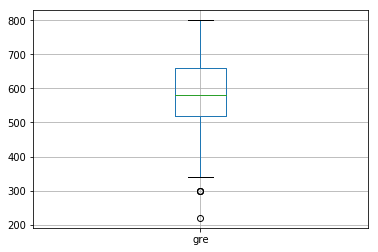

In [29]:
#boxplot 1
df_cleaned.boxplot('gre')

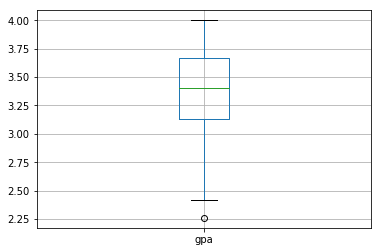

In [30]:
#boxplot 2 
df_cleaned.boxplot('gpa')

#### Question 7. What do this plots show?

They show the outliers, the quartiles of the distributions, and the median. They also show that there are outliers at the low end of both scales.

#### Question 8. Describe each distribution 

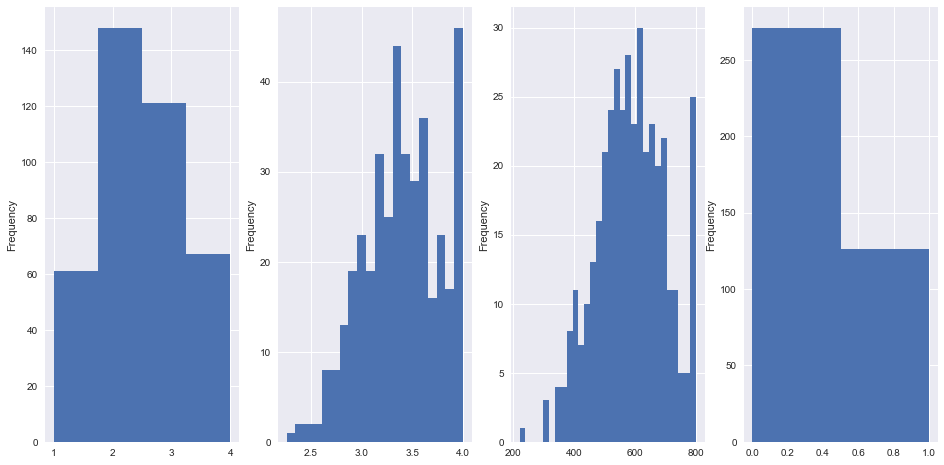

In [53]:
# plot the distribution of each variable 
figure, axes = plt.subplots(1, 4)
df_cleaned['prestige'].plot(kind='hist', x='Prestige', ax=axes[0], bins=4, figsize=(16, 8))
df_cleaned['gpa'].plot(kind='hist', x='GPA', ax=axes[1], bins=20)
df_cleaned['gre'].plot(kind='hist', x='GRE', ax=axes[2], bins=30)
df_cleaned['admit'].plot(kind='hist', x='Admitted', ax=axes[3], bins=2)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [40]:
from scipy.stats import normaltest
print normaltest(df_cleaned)

NormaltestResult(statistic=array([ 2203.82079872,     3.81798293,    13.07987556,    49.42125322]), pvalue=array([  0.00000000e+00,   1.48229806e-01,   1.44457838e-03,
         1.85486036e-11]))


Answer: No. The p-values of the normality test (for non-GPA values) are too low; we must reject the hypothesis that these are normal distributions.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: We need to correct GPA and GRE. They are skewed and have natural limits, so we should log transform them (admission is not at all normally distributed but we should definitely not correct it, because admission is binary).

#### Question 11. Which of our variables are potentially colinear? 

In [54]:
# create a correlation matrix for the data
df_cleaned.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: There is a positive correlation between GRE and GPA, and a negative correlation between prestige and admission. It is weak, however. The strongest correlation is between GPA and GRE.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We want to determine how higher prestige (lower number) relates to admission. Given the negative correlation, which indicates at least weakly that , we want to see if we can find stronger evidence for such a correlation. A linear regression is unlikely to be a good model here, so we should select a different sort of model. A logistic regression, I'd think?

#### Question 14. What is your hypothesis? 

Answer: The more prestigious the undergraduate school, the higher the likelihood of admission into grad school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data